In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

### Loading data from a CSV file

The code above uses the **pandas** library to read data from the file `kc_house_data.csv`.  
- `pd.read_csv("kc_house_data.csv")` – loads the CSV file into a `DataFrame` object.  
- `data.head()` – displays the first 5 rows of the dataset to quickly inspect its structure.  

This helps to check which columns are available and what the initial values look like.


In [33]:
#a)
data = pd.read_csv("kc_house_data.csv")
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### b) Print the variable list. Select categorical and numerical variables.

- `print(data.columns)` – prints the full list of column names in the dataset.  
- The dataset is then split into two parts:  
  - **Categorical variables**: stored in `house_categorical_df`, containing features like `id`, `waterfront`, `view`, `condition`, `grade`, and `zipcode`.  
  - **Numerical variables**: stored in `house_numerical_df`, containing features such as `date`, `price`, `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, `sqft_above`, `sqft_basement`, `yr_built`, `yr_renovated`, `lat`, `long`, `sqft_living15`, and `sqft_lot15`.  

This step helps to separate the dataset into categorical and numerical features, which is useful for further analysis and applying the right preprocessing techniques.


In [22]:
#b)
print (data.columns)
house_categorical_df = data[['id', 'waterfront', 'view', 'condition', 'grade', 'zipcode']]
house_numerical_df = data[['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [23]:
house_numerical_df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located.

# Price vs. Square Footage

The scatter plot shows that **price increases with the size of the house**, indicating an approximate **linear relationship** between `sqft_living` and `price`.


Text(0, 0.5, 'Price')

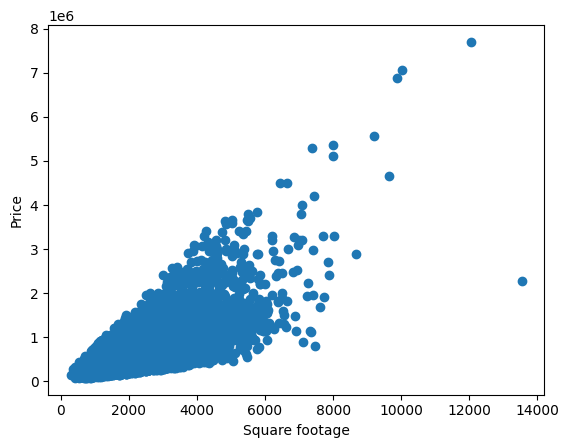

In [34]:
#a)
plt.scatter(data.sqft_living, data.price)
plt.xlabel("Square footage")
plt.ylabel("Price")


# Price vs. Grade

The scatter plot shows that **price increases with the house grade**, indicating a positive relationship between `grade` and `price`.


Text(0, 0.5, 'Price')

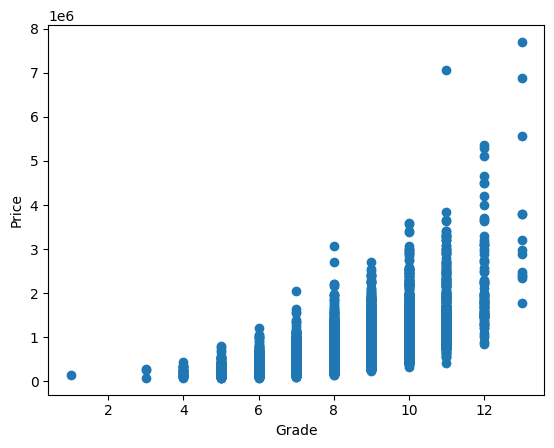

In [35]:
#b
plt.scatter(data.grade, data.price)
plt.xlabel("Grade")
plt.ylabel("Price")



# Price vs. Zipcode

The scatter plot shows how **house prices vary across different zipcodes**. Some zipcodes cluster with higher or lower prices, probably reflecting differences between neighborhoods.


Text(0, 0.5, 'Price')

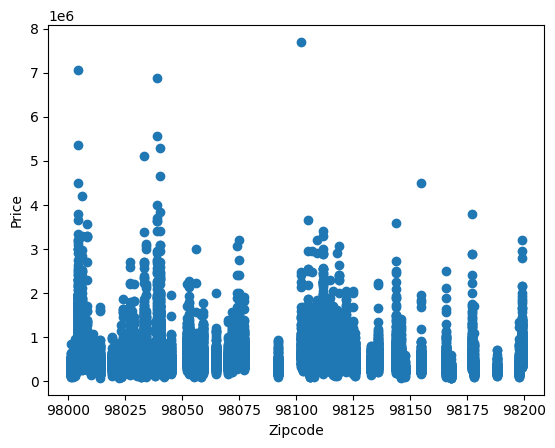

In [28]:
#c
plt.scatter(data.zipcode, data.price)
plt.xlabel("Zipcode")
plt.ylabel("Price")


### House Distribution in King County (Seattle)

- **X-axis:** Longitude  
- **Y-axis:** Latitude  
- **Each point:** Represents a single house  
- **Color (viridis scale):** House grade (darker = lower, lighter = higher)  
- **Alpha:** 0.7, to highlight dense areas  

**Interpretation:**  
Houses are concentrated in the main city areas. Higher-grade homes form distinct clusters, showing that the best houses are located in specific neighborhoods. This plot visualizes the geographic relationship between location and house quality.


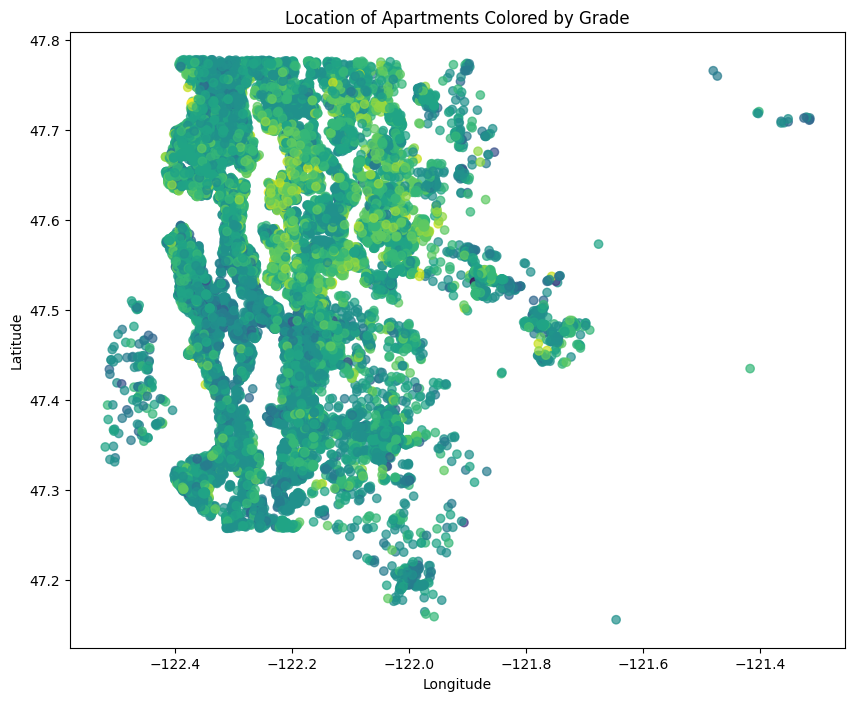

In [36]:
#c
plt.figure(figsize=(10,8))

scatter = plt.scatter(data['long'], data['lat'],
                      c=data['grade'], cmap='viridis', alpha=0.7)

plt.title("Location of Apartments Colored by Grade")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

### House Prices by Grade

**Interpretation:**  
 Higher-grade homes generally have higher prices, as seen from the increasing median and overall box heights.


<Axes: title={'center': 'price'}, xlabel='[grade]'>

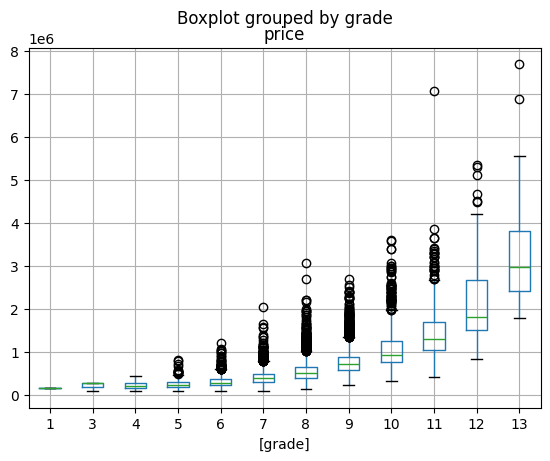

In [37]:
#a)

box_data = data[["grade", "price"]]
box_data.boxplot (by="grade")



The `mosaic` function from **statsmodels** creates a **mosaic plot**, which is a graphical representation of the relationship between two categorical variables.  

- In this case, it shows the relationship between `bathrooms` and `bedrooms`.  
- The size of each rectangle corresponds to the frequency of that combination in the dataset.  

This plot helps to visually identify patterns or associations between the number of bathrooms and bedrooms in the houses.


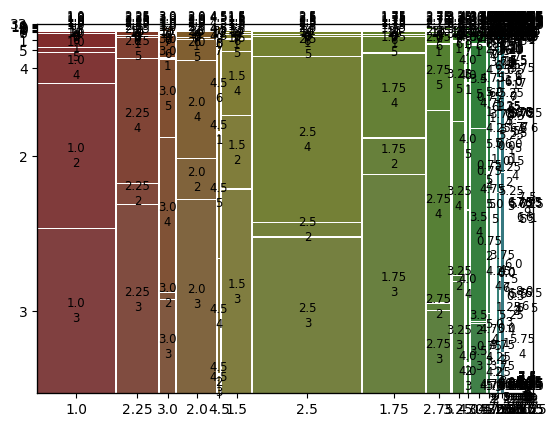

In [38]:
#b
from statsmodels.graphics.mosaicplot import mosaic
mosaic(data, ['bathrooms', 'bedrooms']);



## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

## **Interpretation:**  
This shows houses that match the specified criteria, giving a quick overview of their characteristics.


In [39]:
data_bbf = data.loc [(data['bedrooms'] == 3) & (data['bathrooms'] == 2) & (data['floors'] == 2)]
data_bbf.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.540000e+02,1.540000e+02,154.0,154.0,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,4.397177e+09,5.144986e+05,3.0,2.0,1850.279221,23678.948052,2.0,0.006494,0.357143,3.435065,7.551948,1717.422078,132.857143,1969.779221,284.863636,98085.577922,47.567376,-122.247091,1802.337662,17545.123377
std,2.849813e+09,2.497661e+05,0.0,0.0,547.585413,83324.024708,0.0,0.080582,0.919495,0.713322,0.832684,527.473851,248.092631,34.654456,700.057328,48.808788,0.143221,0.150507,453.210930,40404.134611
min,7.600057e+06,2.090000e+05,3.0,2.0,1020.000000,700.000000,2.0,0.000000,0.000000,2.000000,6.000000,720.000000,0.000000,1900.000000,0.000000,98001.000000,47.194700,-122.519000,850.000000,886.000000
25%,2.060901e+09,3.769750e+05,3.0,2.0,1452.500000,3414.750000,2.0,0.000000,0.000000,3.000000,7.000000,1402.500000,0.000000,1942.250000,0.000000,98038.500000,47.498800,-122.361750,1452.500000,4020.000000
50%,3.630010e+09,4.640000e+05,3.0,2.0,1700.000000,5868.500000,2.0,0.000000,0.000000,3.000000,7.000000,1625.000000,0.000000,1984.500000,0.000000,98103.000000,47.584750,-122.299500,1725.000000,6278.000000
75%,7.184074e+09,5.894625e+05,3.0,2.0,2127.500000,10800.250000,2.0,0.000000,0.000000,4.000000,8.000000,1977.500000,207.500000,1997.500000,0.000000,98122.000000,47.682400,-122.149250,2117.500000,10392.250000
max,9.829200e+09,1.755000e+06,3.0,2.0,3650.000000,843309.000000,2.0,1.000000,4.000000,5.000000,10.000000,3650.000000,1120.000000,2014.000000,2014.000000,98199.000000,47.777000,-121.709000,3170.000000,273992.000000


### Highlight Selected Houses on Grade vs Price Plot

**Interpretation:**  
This scatter plot shows all houses with their grade vs price. The subset of interest (3BR, 2BA, 2 floors) is overlaid, making it easy to see where these houses lie relative to the rest.








Text(0, 0.5, 'Price')

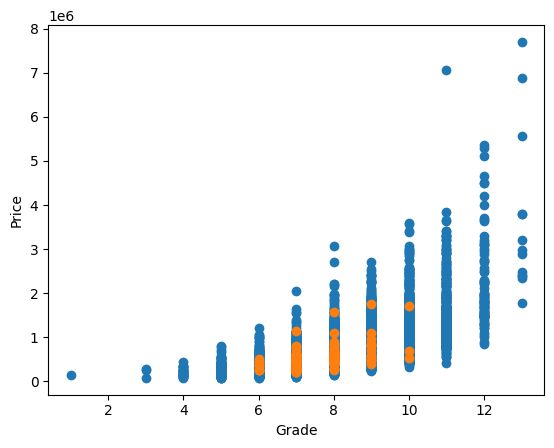

In [40]:
# b
plt.scatter(data.grade, data.price)
plt.scatter(data_bbf.grade, data_bbf.price)
plt.xlabel("Grade")
plt.ylabel("Price")


### Calculating price per square foot and sorting

- `data_bbf = data_bbf.copy()` – creates a copy of the DataFrame to avoid modifying the original data.  
- `data_bbf['price_to_footage'] = data_bbf['price'] / data_bbf['sqft_living']` – adds a new column `price_to_footage` that shows the **price per square foot** for each house.  
- `data_bbf.sort_values('price_to_footage', ascending=True)` – sorts the data in ascending order based on price per square foot, from the cheapest to the most expensive per unit of area.  

This makes it easy to identify both the most and least expensive houses in terms of price per square foot.


In [42]:
#c)
data_bbf = data_bbf.copy()
data_bbf['price_to_footage'] = data_bbf['price'] / data_bbf['sqft_living']

data_bbf.sort_values('price_to_footage', ascending=True)



,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_to_footage
9704,7452500565,20140829T000000,260000.0,3,2.0,2710,5000,2.0,0,0,...,2710,0,1951,0,98126,47.5188,-122.373,850,5000,95.940959
11258,7937600262,20140710T000000,379900.0,3,2.0,3110,44967,2.0,0,0,...,3020,90,1999,0,98058,47.4343,-122.082,2150,44967,122.154341
19880,3832050860,20150319T000000,210000.0,3,2.0,1580,4961,2.0,0,0,...,1580,0,2006,0,98042,47.3338,-122.053,2280,5000,132.911392
16014,5104450440,20141113T000000,252500.0,3,2.0,1810,10684,2.0,0,0,...,1810,0,1987,0,98058,47.4619,-122.153,2140,9657,139.502762
20906,3355400242,20141028T000000,274900.0,3,2.0,1936,6612,2.0,0,0,...,1936,0,2014,0,98001,47.2602,-122.246,1620,21600,141.993802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14379,9829200325,20140617T000000,765000.0,3,2.0,1570,7000,2.0,0,2,...,1050,520,1971,0,98122,47.6061,-122.286,1990,6675,487.261146
13853,6795100330,20140625T000000,1150000.0,3,2.0,2110,18815,2.0,0,0,...,2110,0,1979,0,98075,47.5836,-122.042,2690,21010,545.023697
10527,5318100935,20141020T000000,850000.0,3,2.0,1540,3600,2.0,0,0,...,1540,0,1900,1988,98112,47.6343,-122.283,2970,3600,551.948052
5827,9829200250,20150105T000000,1697000.0,3,2.0,2600,6600,2.0,0,4,...,1930,670,1970,2014,98122,47.6055,-122.285,2670,6270,652.692308
